 # bicicletas electricas compartidas 
* ## El conjunto de datos presenta datos recopilados a través de una encuesta por cuestionario.
* ## La muestra de la encuesta incluyó a 369 adultos (mayores de 16 años), usuarios activos y potenciales de servicios de uso compartido de bicicletas eléctricas. El cuestionario se estructura en dos sesiones: la primera incluye preguntas sobre datos socioeconómicos, la segunda sobre las intenciones de utilizar estos servicios en el futuro en función de los costes de uso.

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from scipy.stats import chi2_contingency

In [2]:
data = pd.read_excel("./bicicletas-compartidas-en-ciudades.xlsx")
data.head()

,dt_inicio,Have you ever used bikesharing (shared bicycles)?,How often?,In which city?,"If you answered in another city, which one?",For what type of trips (Indicate the most common when you have used this service),"If available, would you use a shared electric bike system in Santander?",How often?.1,For what type of trips (Indicate the most common for which you would use it),Indicate your gender,...,escenario_1,escenario_2,escenario_3,escenario_4,escenario_5,escenario_6,escenario_10,escenario_11,escenario_12,dt_fin
0,2023-07-11 11:16:38.185107,No,NaN,NaN,NaN,NaN,Yes,Weekly,Leisure,Female,...,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,2023-07-11 11:18:10.688187
1,2023-07-11 11:49:36.519671,Yes,Occasionally,Santander,NaN,Leisure,Don’t know/depends,Occasionally,Leisure,Male,...,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,2023-07-11 12:00:41.540462
2,2023-07-11 12:03:37.418273,Yes,Occasionally,Santander,NaN,Leisure,Yes,Occasionally,Leisure,Female,...,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,2023-07-11 12:08:31.842456
3,2023-07-11 12:08:33.205361,Yes,Occasionally,Santander,NaN,Leisure,Yes,Occasionally,Leisure,Female,...,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2023-07-11 12:10:51.803418
4,2023-07-11 12:08:33.205361,Yes,Occasionally,Santander,NaN,Leisure,Yes,Occasionally,Leisure,Female,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2023-07-11 12:12:04.714281


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 370 entries, 0 to 369
Data columns (total 26 columns):
 #   Column                                                                             Non-Null Count  Dtype  
---  ------                                                                             --------------  -----  
 0   dt_inicio                                                                          370 non-null    object 
 1   Have you ever used bikesharing (shared bicycles)?                                  368 non-null    object 
 2   How often?                                                                         91 non-null     object 
 3   In which city?                                                                     91 non-null     object 
 4   If you answered in another city, which one?                                        36 non-null     object 
 5   For what type of trips (Indicate the most common when you have used this service)  91 non-null     object 

In [4]:
data = data.rename(columns={"Have you ever used bikesharing (shared bicycles)?":"uso bicicompartidas?",
                           "How often?":"frecuencia de uso",
                           "In which city?":"Ciudad","If you answered in another city, which one?":"respondio en otra ciudad?",
                           "For what type of trips (Indicate the most common when you have used this service)":"que uso le da",
                           "If available, would you use a shared electric bike system in Santander?":"utilizarias este sistema?",
                           "How often?.1":"Con que frecuencia",
                            "For what type of trips (Indicate the most common for which you would use it)":"tipo de viajes que lo usarias",
                           "Indicate your gender":"Genero","Indicate your age":"Edad","What is your employment status?":"situacion laboral",
                           "Profession":"Profesion","Level of education":"Nivel de educacion","Place of residence":"lugar de residencia",
                           "Street, neighborhood, or postal code of residence in Santander":"calle,barrio o codigo postal",})

In [5]:
data.head()

,dt_inicio,uso bicicompartidas?,frecuencia de uso,Ciudad,respondio en otra ciudad?,que uso le da,utilizarias este sistema?,Con que frecuencia,tipo de viajes que lo usarias,Genero,...,escenario_1,escenario_2,escenario_3,escenario_4,escenario_5,escenario_6,escenario_10,escenario_11,escenario_12,dt_fin
0,2023-07-11 11:16:38.185107,No,NaN,NaN,NaN,NaN,Yes,Weekly,Leisure,Female,...,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,2023-07-11 11:18:10.688187
1,2023-07-11 11:49:36.519671,Yes,Occasionally,Santander,NaN,Leisure,Don’t know/depends,Occasionally,Leisure,Male,...,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,2023-07-11 12:00:41.540462
2,2023-07-11 12:03:37.418273,Yes,Occasionally,Santander,NaN,Leisure,Yes,Occasionally,Leisure,Female,...,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,2023-07-11 12:08:31.842456
3,2023-07-11 12:08:33.205361,Yes,Occasionally,Santander,NaN,Leisure,Yes,Occasionally,Leisure,Female,...,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2023-07-11 12:10:51.803418
4,2023-07-11 12:08:33.205361,Yes,Occasionally,Santander,NaN,Leisure,Yes,Occasionally,Leisure,Female,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2023-07-11 12:12:04.714281


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 370 entries, 0 to 369
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   dt_inicio                      370 non-null    object 
 1   uso bicicompartidas?           368 non-null    object 
 2   frecuencia de uso              91 non-null     object 
 3   Ciudad                         91 non-null     object 
 4   respondio en otra ciudad?      36 non-null     object 
 5   que uso le da                  91 non-null     object 
 6   utilizarias este sistema?      369 non-null    object 
 7   Con que frecuencia             256 non-null    object 
 8   tipo de viajes que lo usarias  258 non-null    object 
 9   Genero                         366 non-null    object 
 10  Edad                           368 non-null    object 
 11  situacion laboral              370 non-null    object 
 12  Profesion                      220 non-null    obj

In [7]:
# Nos fijamos si tenemos datos NaN
data.isna().sum()

dt_inicio                          0
uso bicicompartidas?               2
frecuencia de uso                279
Ciudad                           279
respondio en otra ciudad?        334
que uso le da                    279
utilizarias este sistema?          1
Con que frecuencia               114
tipo de viajes que lo usarias    112
Genero                             4
Edad                               2
situacion laboral                  0
Profesion                        150
Nivel de educacion                 3
lugar de residencia                2
calle,barrio o codigo postal     134
escenario_1                      103
escenario_2                      103
escenario_3                      103
escenario_4                      103
escenario_5                      103
escenario_6                      103
escenario_10                     103
escenario_11                     103
escenario_12                     103
dt_fin                             0
dtype: int64

* ## Tenemos bastantes datos nulos en la encuesta, los que tiene mayor numeros de NaN son estos

* frecuencia de uso                279
* Ciudad                           279 
* respondio en otra ciudad?        334 
* que uso le da                    279

----

* ## Analizis de las frecuencias utilización del sistema ,frecuencia de uso ,tipo de viajes que se hacen con las bicis ⬇️⬇️⬇️

In [8]:
utilizacion_counts = data['utilizarias este sistema?'].value_counts()
utilizacion_counts

Yes                   207
No                    103
Don’t know/depends     59
Name: utilizarias este sistema?, dtype: int64

In [9]:
# Frecuencia de uso y tipo de viajes
frecuencia_uso = data['frecuencia de uso'].value_counts()
frecuencia_uso

Occasionally    74
Weekly          12
Daily            4
Monthly          1
Name: frecuencia de uso, dtype: int64

In [10]:
tipo_viajes = data['tipo de viajes que lo usarias'].value_counts()
tipo_viajes

Leisure                 142
Work                     38
Studies                  19
Other                    14
Administrative tasks     14
Sport                    13
Health                   10
Shopping                  8
Name: tipo de viajes que lo usarias, dtype: int64

In [11]:
# Frecuencia de respuestas por ciudad
frecuencia_por_ciudad = data['Ciudad'].value_counts()
frecuencia_por_ciudad

Santander    58
Other        33
Name: Ciudad, dtype: int64

In [12]:
generos = data['Genero'].value_counts()
generos

Female                   194
Male                     164
Prefer not to specify      8
Name: Genero, dtype: int64

In [13]:
edades = data["Edad"].value_counts()
edades

Under 25       67
55-64          66
25-34          59
35-44          57
45-54          56
65-74          41
75 and over    22
Name: Edad, dtype: int64

In [14]:
uso_bicicompartidas_conteo = data["uso bicicompartidas?"].value_counts()
uso_bicicompartidas_conteo

No     277
Yes     91
Name: uso bicicompartidas?, dtype: int64

----
* # GRAFICO DE DATOS DESCRIPTIVOS 


* ### Veremos como se comportan los graficos, lo separamos en dos grupos para que no esten muy juntos y sea mas legible

In [49]:
data_desc = ["uso bicicompartidas?","frecuencia de uso","Ciudad",
             "respondio en otra ciudad?","que uso le da","utilizarias este sistema?","Con que frecuencia"]

data_desc1 = ["tipo de viajes que lo usarias","Genero","Edad","situacion laboral",
            "Nivel de educacion","lugar de residencia"]

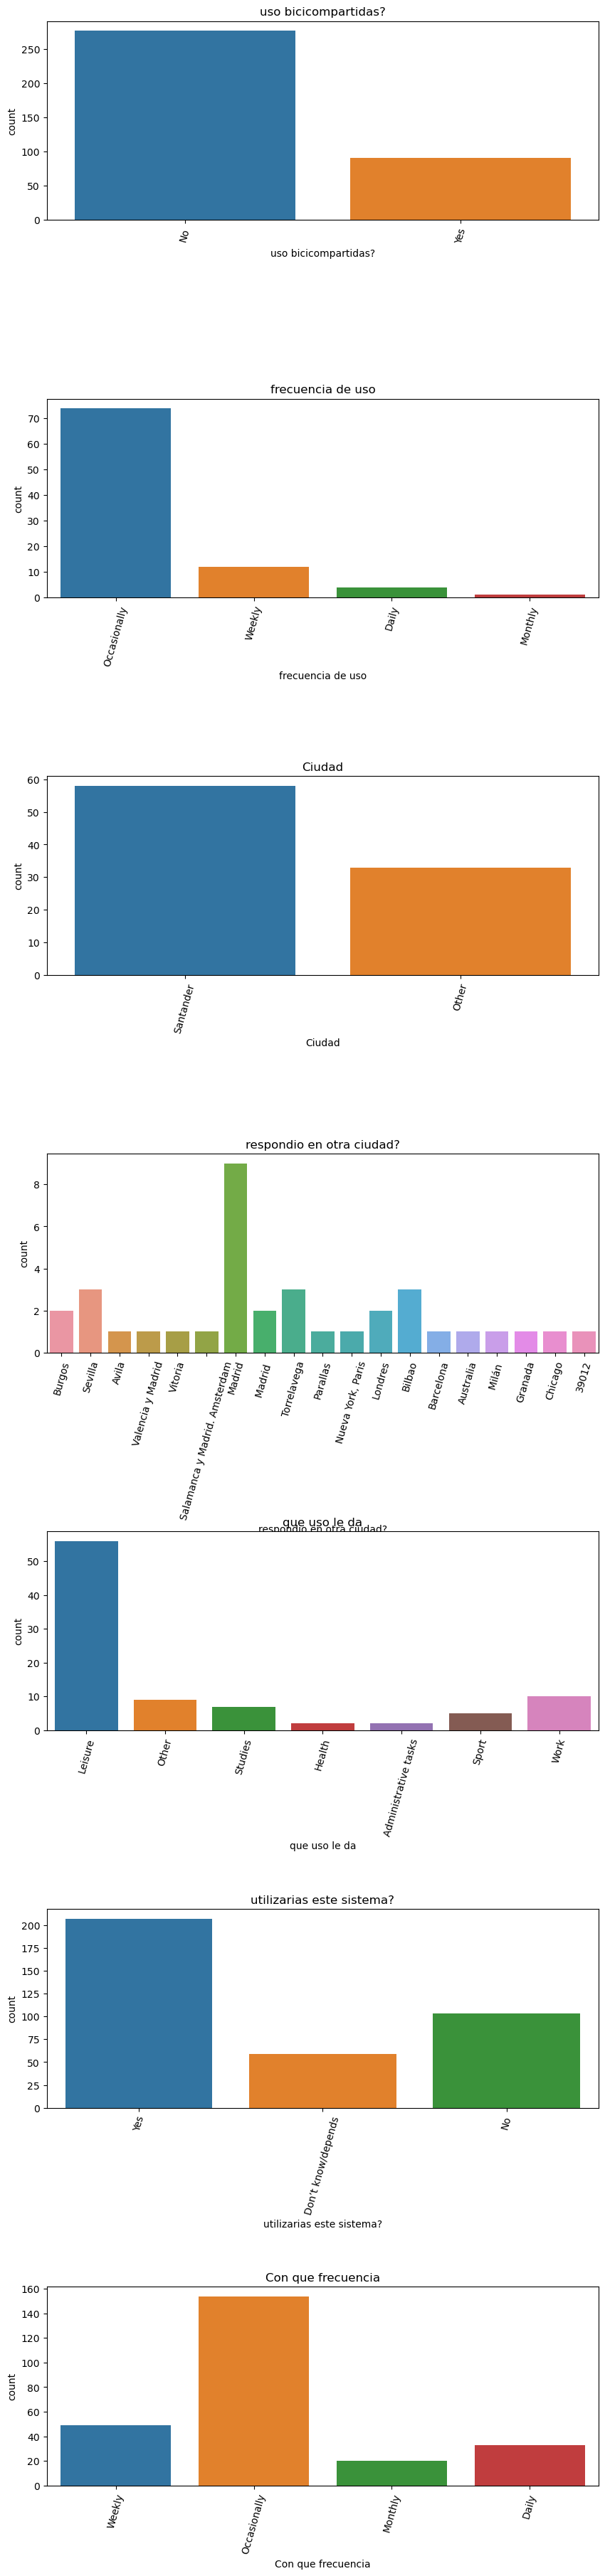

In [52]:
fig, ax = plt.subplots(nrows=len(data_desc),ncols=1,figsize=(10,45))
fig.subplots_adjust(hspace=0.9)

for i, col in enumerate(data_desc):
    sns.countplot(x=col , data=data , ax=ax[i])
    ax[i].set_title(col)
    ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=74)

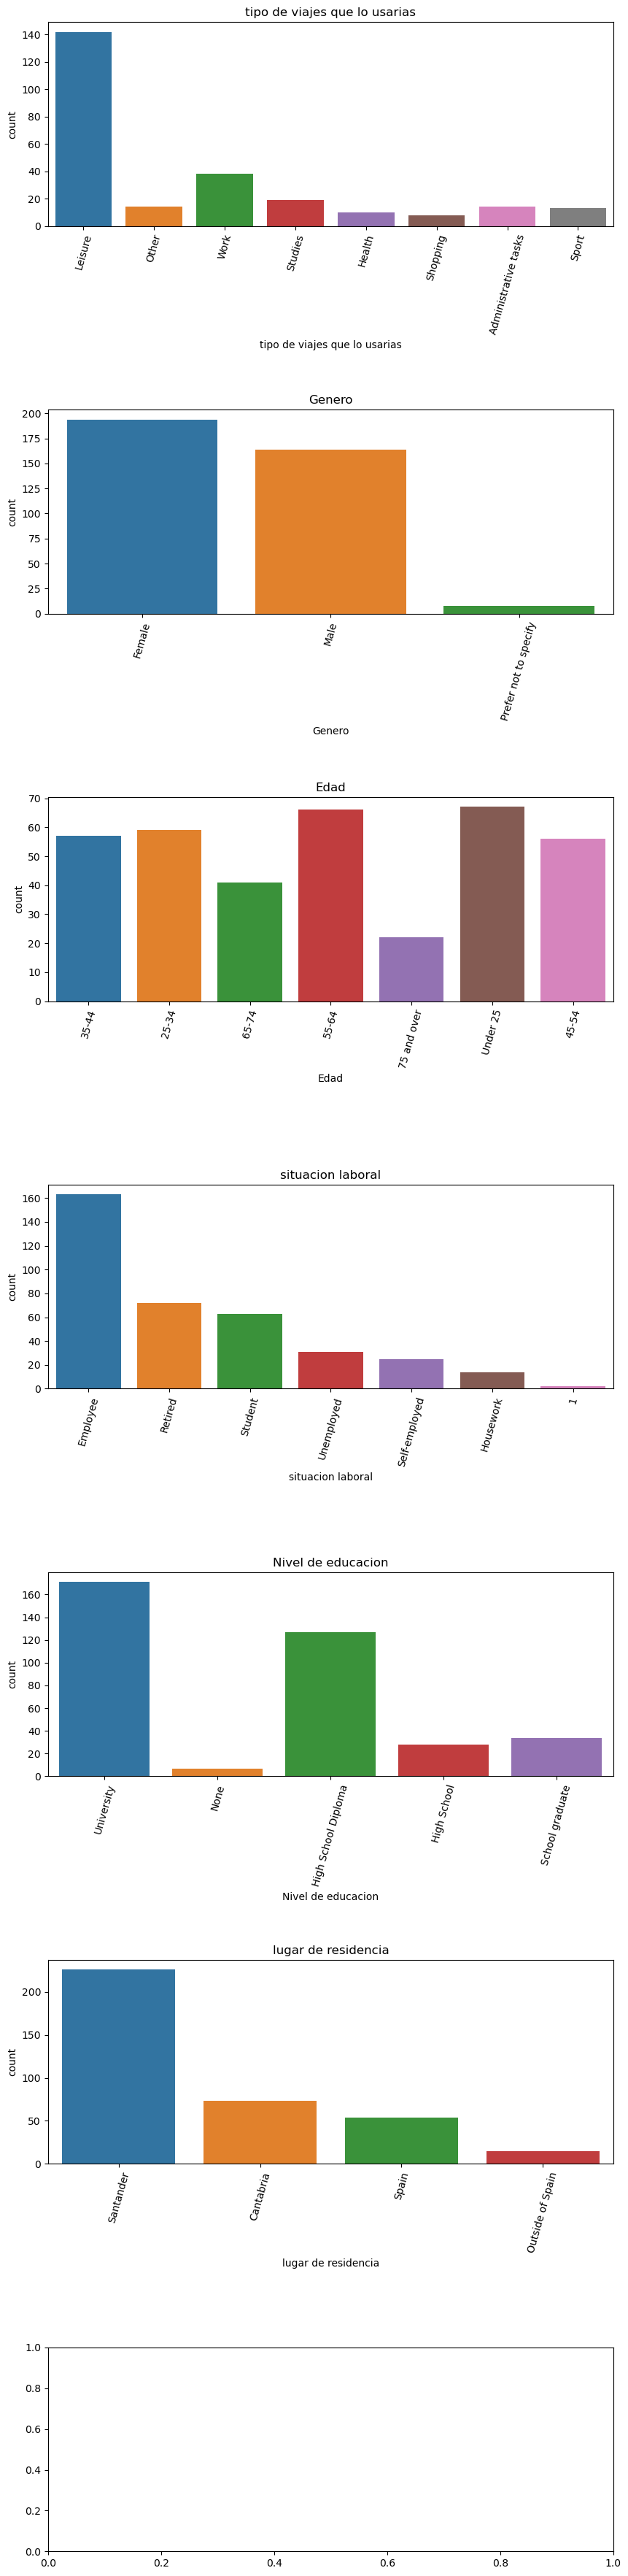

In [53]:
fig, ax = plt.subplots(nrows=len(data_desc),ncols=1,figsize=(10,45))
fig.subplots_adjust(hspace=0.9)

for i, col in enumerate(data_desc1):
    sns.countplot(x=col , data=data , ax=ax[i])
    ax[i].set_title(col)
    ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=74)

-----
* # VAMOS A HACER UN ANÁLISIS DE RELACIÓN ENTRE LA FRECUENCIA DE USO Y OTRAS VARIABLES
    * ### Vamos a dividir la población en grupos o segmentos según diferentes variables y luego analizar las diferencias entre esos segmentos.
    
    
* ## Crearemos una funcion para hacer un análisis de relación con las edades


In [57]:
def asignar_valor_edad(rango):
    if isinstance (rango,float):
        return 0
    elif "Under 25" in rango:
        return 20
    elif "25-34" in rango:
        return 30
    elif "35-44" in rango:
        return 40
    elif "45-54" in rango:
        return 50
    elif "55-64" in rango:
        return 60
    elif "65-74" in rango:
        return 70
    elif "75 and over" in rango:
        return 80

In [58]:
data['Edad_Num'] = data['Edad'].apply(asignar_valor_edad)

In [72]:
eliminar_columnas = ["escenario_1", "escenario_2" , "escenario_3","escenario_4", "escenario_5" , "escenario_6",
                    "escenario_10","escenario_11" , "escenario_12"]
data = data.drop(eliminar_columnas , axis=1)

----
* # ANÁLISIS DESCRIPTIVO 

In [75]:
data.describe()

,Edad_Num
count,370.000000
mean,45.351351
std,18.726698
min,0.000000
25%,30.000000
50%,45.000000
75%,60.000000
max,80.000000


* **Vemos que la media de edad en la encuesta es de alrededor 45 años.**
* **Igualmente si nos guiamos por la grafica vemos que la media es 45 por el simple echo de que contestaron a la encuesta mayormente eran menores de 25 años y entre 55-64 años luego 25-34.** 


* **ABAJO LO DEJO EN NUMEROS**
⬇️⬇️

In [76]:
edades

Under 25       67
55-64          66
25-34          59
35-44          57
45-54          56
65-74          41
75 and over    22
Name: Edad, dtype: int64

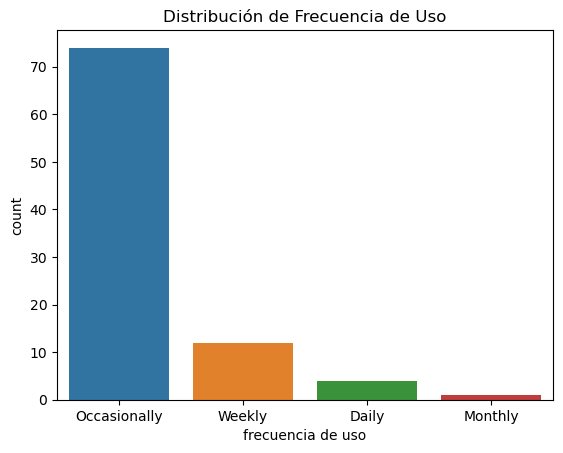

Occasionally    74
Weekly          12
Daily            4
Monthly          1
Name: frecuencia de uso, dtype: int64

In [87]:
# Frecuencia de uso y otras variables categóricas
sns.countplot(x='frecuencia de uso', data=data)
plt.title('Distribución de Frecuencia de Uso')
plt.show()

frecuencia_uso

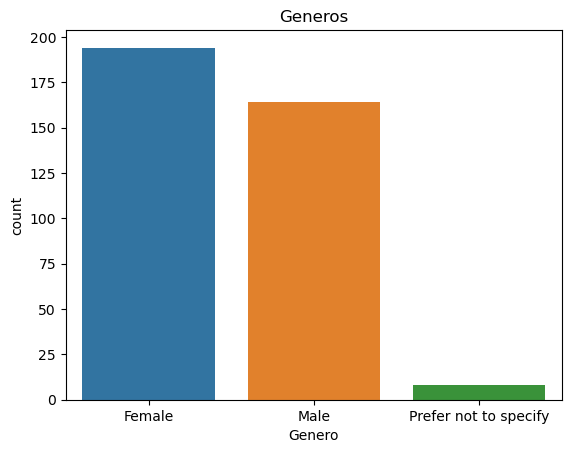

Female                   194
Male                     164
Prefer not to specify      8
Name: Genero, dtype: int64

In [89]:
sns.countplot(x='Genero', data=data)
plt.title('Generos')
plt.show()


genero_counts

----
* # Análisis de Segmentación
### Realiza un análisis de segmentación para entender las diferencias en las respuestas entre grupos de la población:

In [91]:
# Segmentación por género
segmentacion_genero

,Edad_Num
Genero,
Female,45.000000
Male,46.585366
Prefer not to specify,37.500000


In [93]:
# Segmentación por frecuencia de uso
segmentacion_frecuencia = data.groupby('frecuencia de uso').mean()
segmentacion_frecuencia

C:\Users\Acer\AppData\Local\Temp\ipykernel_12140\2393327125.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  segmentacion_frecuencia = data.groupby('frecuencia de uso').mean()


,Edad_Num
frecuencia de uso,
Daily,37.500000
Monthly,60.000000
Occasionally,43.513514
Weekly,42.500000


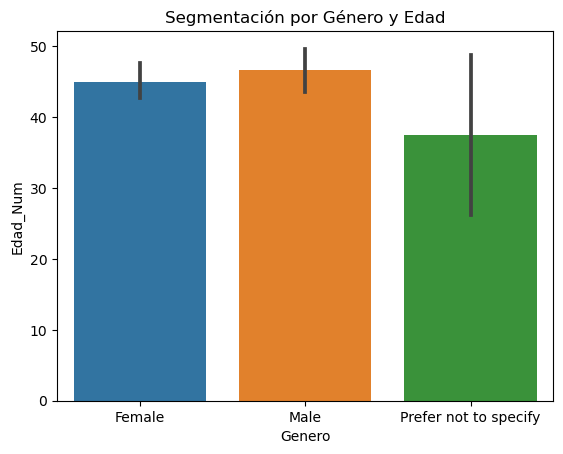

In [94]:
sns.barplot(x='Genero', y='Edad_Num', data=data)
plt.title('Segmentación por Género y Edad')
plt.show()

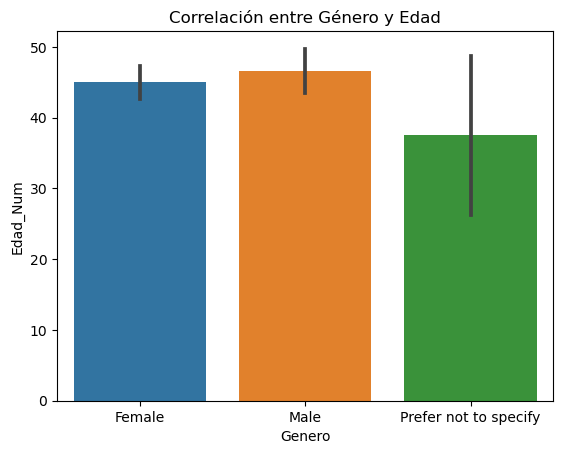

In [97]:
# Correlación entre Edad_Num y otras variables categóricas
correlacion_genero_edad = data.groupby('Genero')['Edad_Num'].mean()
correlacion_frecuencia_edad = data.groupby('frecuencia de uso')['Edad_Num'].mean()

sns.barplot(x='Genero', y='Edad_Num', data=data)
plt.title('Correlación entre Género y Edad')
plt.show()

----------
* # Prueba de Chi-Cuadrado:
* ### Se utiliza para evaluar la independencia entre dos variables categóricas. Se puede evaluar si hay una relación significativa entre dos columnas categóricas, como el género y la frecuencia de uso.


In [99]:
#Creamos una tabla
tabla_contingencia = pd.crosstab(data["Genero"] , data["frecuencia de uso"])

In [100]:
chi2 , p ,_ , _ = chi2_contingency(tabla_contingencia)

In [102]:
print(f"Estadistico de Chi-Cuadrado 'chi2': {chi2}")

print(f"Valor p: {p}")

Estadistico de Chi-Cuadrado 'chi2': 12.870206520381394
Valor p: 0.045144009133972145


In [105]:
#Interpretamos el resultado 
if p < 0.05:
    print("Se podria decir que hay una relación significativa entre Genero y Frecuencia de uso")
else:
    print(" No hay evidencia suficiente para rechazar la independencia entre genero y Frecuencia de Uso.")
        

Se podria decir que hay una relación significativa entre Genero y Frecuencia de uso


In [188]:
tabla_contingencia1 = pd.crosstab(data["situacion laboral"] , data["frecuencia de uso"])

chi2 , p ,_ , _ = chi2_contingency(tabla_contingencia1)

print(f"Estadistico de Chi-Cuadrado 'chi2': {chi2}")

print(f"Valor p: {p}")

Estadistico de Chi-Cuadrado 'chi2': 11.424930043680043
Valor p: 0.7219314993010209


In [191]:
#Interpretamos el resultado 
if p < 0.05:
    print("Se podria decir que hay una relación significativa entre Genero y la situacion laboral de la persona")
else:
    print(" No hay evidencia suficiente para rechazar la independencia entre situacion laboral y Frecuencia de Uso.")
        

 No hay evidencia suficiente para rechazar la independencia entre situacion laboral y Frecuencia de Uso.


In [202]:
tabla_contingencia1 = pd.crosstab(data["Nivel de educacion"] , data["frecuencia de uso"])

chi2 , p ,_ , _ = chi2_contingency(tabla_contingencia1)

print(f"Estadistico de Chi-Cuadrado 'chi2': {chi2}")

print(f"Valor p: {p}")

Estadistico de Chi-Cuadrado 'chi2': 8.289261252446185
Valor p: 0.7621367608327685


In [204]:
#Interpretamos el resultado 
if p < 0.05:
    print("Se podria decir que hay una relación significativa entre Nivel de educación y frecuencia de uso")
else:
    print(" No hay evidencia suficiente para rechazar la independencia entre Nivel de educación y Frecuencia de Uso.")
        

 No hay evidencia suficiente para rechazar la independencia entre Nivel de educación y Frecuencia de Uso.


In [205]:
tabla_contingencia1 = pd.crosstab(data["tipo de viajes que lo usarias"] , data["frecuencia de uso"])

chi2 , p ,_ , _ = chi2_contingency(tabla_contingencia1)

print(f"Estadistico de Chi-Cuadrado 'chi2': {chi2}")

print(f"Valor p: {p}")

Estadistico de Chi-Cuadrado 'chi2': 31.01525704809287
Valor p: 0.028670445577460037


In [207]:
#Interpretamos el resultado 
if p < 0.05:
    print("Se podria decir que hay una relación significativa entre Tipo de viaje que lo usarias y frecuencia de uso")
else:
    print(" No hay evidencia suficiente para rechazar la independencia entre Tipo de viaje que lo usarias y Frecuencia de Uso.")
        

Se podria decir que hay una relación significativa entre Tipo de viaje que lo usarias y frecuencia de uso


----
* # Análisis de Correspondencias Múltiples (ACM): 

* ## ACM es una técnica multivariada que se utiliza cuando se tiene más de dos variables categóricas. Vamos a hacer un ejemplo sencillo utilizando variables categóricas.
* #### Nunca use esta tecnica, siempre opté por hacer uno por uno, pero por lo visto es mejor usar esta tecnica y es menos tediosa.

In [118]:
from prince import MCA

In [145]:
variables_acm = ["Genero" , "frecuencia de uso" ,"situacion laboral", "Edad", "Nivel de educacion" , "Profesion"]

data_acm = data[variables_acm]

In [146]:
mca = MCA(n_components=2)
mca.fit(data_acm)

MCA()

In [147]:
coordenadas_individuos = mca.transform(data_acm)

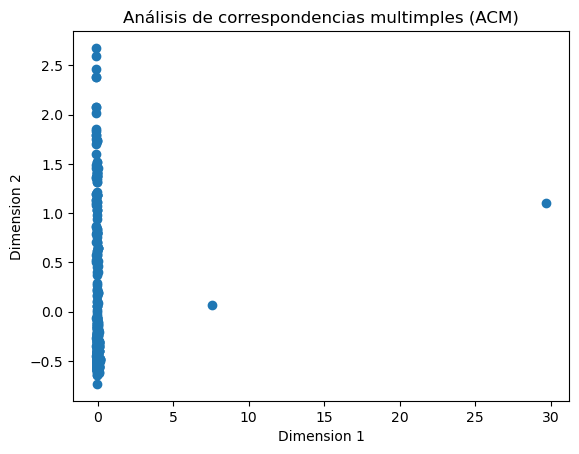

In [148]:
#### visualizamos los resultados a ver que tal

plt.scatter(coordenadas_individuos.iloc[:,0], coordenadas_individuos.iloc[:,1])
plt.title("Análisis de correspondencias multimples (ACM)")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()

* ### La dimensión 1 explica la mayor parte de la variación entre nuestras observaciones, y notamos que las respuestas se agrupan en puntos específicos en 0, 7 y 30 en esta dimensión. Esto podría indicar patrones o asociaciones particulares entre ciertas categorías en los datos.
----

In [149]:
etiquetas_categorias = data_acm.columns
for i, etiqueta in enumerate (etiquetas_categorias):
    print(f"{etiqueta}: ({coordenadas_individuos.iloc[i,0]}, {coordenadas_individuos.iloc[i,1]})")

Genero: (-0.04151750660733794, -0.5427264806688087)
frecuencia de uso: (-0.06666746789900553, -0.46946887448154395)
situacion laboral: (-0.07155735488188733, 0.8029914179589079)
Edad: (-0.07155735488188733, 0.8029914179589079)
Nivel de educacion: (-0.07155735488188733, 0.8029914179589079)
Profesion: (-0.0370010076974851, 0.2928491794354194)


* ### Estas son las coordenadas de las categorias que vimos en el grafico de arriba ( ACM )
-----

* # POR ULTIMO USAREMOS EL ANÁLISIS DE CLUSTER:
* #### los k-means se usan para identificar y entender mejor la estructura de los grupos

In [150]:
from sklearn.cluster import KMeans

In [163]:
#### Número de clústeres
num_clusters = 6

# Crear KMeans y ajustar el modelo
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(coordenadas_individuos)

C:\Users\Acer\anaconda3\envs\Trabajar-con-tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(n_clusters=6, random_state=42)

In [164]:
etiquetas_clusters= kmeans.labels_

In [165]:
#### Asignar las etiquetas de cluster al DataFrame Original o a una copia

data_acm_cluster = data_acm.copy()
data_acm_cluster["Cluster"] = etiquetas_clusters

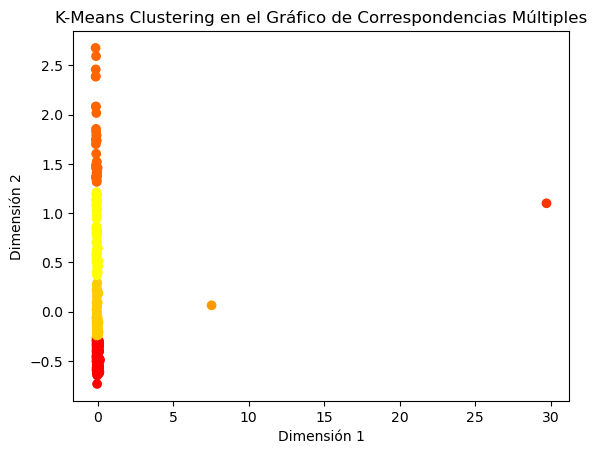

In [180]:
# Visualizar los individuos y sus clústeres en el espacio de las dimensiones
plt.scatter(coordenadas_individuos.iloc[:, 0], coordenadas_individuos.iloc[:, 1], c=etiquetas_clusters, cmap="autumn")
plt.title('K-Means Clustering en el Gráfico de Correspondencias Múltiples')
plt.xlabel('Dimensión 1')
plt.ylabel('Dimensión 2')
plt.show()

* ### Puntos en el Eje 0,0: Categorías cerca del origen en ambas dimensiones tienen asociaciones débiles entre sí.

* ### Puntos Separados Horizontalmente: Categorías más separadas horizontalmente tienen asociaciones más fuertes en la Dimensión 1.

* ### Puntos Separados Verticalmente: Categorías más separadas verticalmente tienen asociaciones más fuertes en la Dimensión 2.
------

* # vemos que los puntos con mas relaciones al uso con frecuencia son segun la edad , Genero y tipo de viaje que lo usarias.
    * ### Los demas puntos no estan tan correlacionados pero alguno si mas que otros.